In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os 
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import *
import pandas as pd
pd.set_option('display.max_rows', 500)
sys.path.insert(0, os.environ["PROJECT_DIR"] + "/estimations/basecamp")
os.chdir(os.environ["PROJECT_DIR"] + "/estimations/basecamp")
from moments import get_moments

<AxesSubplot:>

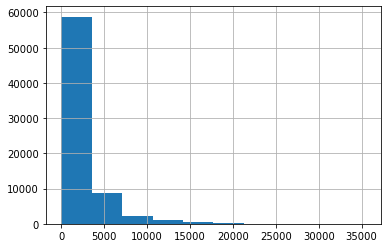

In [61]:
fname = "/home/peisenha/Desktop/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs["Person_Weight"].isnan()

In [50]:
fname = os.environ["PROJECT_DIR"] + "/resources/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs

,Identifier,Period,Education_Level,Experience_Part_Time,Experience_Full_Time,Age_Youngest_Child,Number_of_Children,Partner_Indicator,Choice,Wage_Observed
0,901,32,0,2,33,-1,0,0,2,12.744263
1,901,35,0,2,36,-1,0,0,2,12.813683
2,901,36,0,2,37,-1,0,0,2,12.590151
3,901,37,0,2,38,-1,0,0,2,12.708170
4,901,38,0,2,39,-1,0,0,2,10.990616
...,...,...,...,...,...,...,...,...,...,...
69235,39234801,1,0,0,0,1,1,1,0,NaN
69236,39235601,23,1,0,0,-1,0,1,0,NaN
69237,39235801,31,0,1,0,-1,0,1,1,17.928993
69238,39238001,2,0,0,0,0,3,1,0,NaN


In [78]:
index = ["no_kids_f_educ_low", "no_kids_f_educ_middle", "no_kids_f_educ_high"]
index += ["yes_kids_f_educ_low", "yes_kids_f_educ_middle", "yes_kids_f_educ_high"]
index += ["child_02_f", "child_35_f", "child_610_f"]
index += ["no_kids_p_educ_low", "no_kids_p_educ_middle", "no_kids_p_educ_high"]
index += ["yes_kids_p_educ_low", "yes_kids_p_educ_middle", "yes_kids_p_educ_high"]
index += ["child_02_p", "child_35_p", "child_610_p"]

In [103]:
df_start

value     upper    lower  fixed
category      name                                                        
benefits_base                         200.000000  1000.000  100.000   True
const_wage_eq gamma_0s1                 1.939968     3.700    1.380  False
              gamma_0s2                 2.053860     3.700    1.380  False
              gamma_0s3                 2.189363     3.700    1.380  False
delta                                   0.980000     0.990    0.900   True
disutil_work  child_02_f                0.088035     0.200    0.001  False
              child_02_p               -0.270179    -0.001   -1.500  False
              child_35_f                0.001163     0.200    0.001  False
              child_35_p               -0.341858    -0.001   -1.500  False
              child_610_f               0.027891     0.200    0.001  False
              child_610_p              -0.410474    -0.001   -1.500  False
              no_kids_f_educ_high       0.538150     2.000    0.001  False
              no_kids_f_educ_low        0.538150     2.000    0.001  False
              no_kids_f_educ_middle     0.538150     2.000    0.001  False
              no_kids_p_educ_high      -0.443981    -0.001   -1.500  False
              no_kids_p_educ_low       -0.443981    -0.001   -1.500  False
              no_kids_p_educ_middle    -0.443981    -0.001   -1.500  False
              yes_kids_f_educ_high      1.448252     2.000    0.001  False
              yes_kids_f_educ_low       1.448252     2.000    0.001  False
              yes_kids_f_educ_middle    1.448252     2.000    0.001  False
              yes_kids_p_educ_high     -0.497672    -0.001   -1.500  False
              yes_kids_p_educ_low      -0.497672    -0.001   -1.500  False
              yes_kids_p_educ_middle   -0.497672    -0.001   -1.500  False
exp_accm      g_s1                      0.118576     0.500    0.001  False
              g_s2                      0.273697     0.500    0.001  False
              g_s3                      0.251750     0.500    0.001  False
exp_deprec    delta_s1                  0.020000     0.200    0.001   True
              delta_s2                  0.020000     0.200    0.001   True
              delta_s3                  0.020000     0.200    0.001   True
exp_returns   gamma_1s1                 0.154747     0.500    0.001  False
              gamma_1s2                 0.202052     0.500    0.001  False
              gamma_1s3                 0.287655     0.500    0.001  False
hetrg_unobs   theta_f1                 -0.940325    -0.100   -1.000  False
              theta_p1                 -0.624943    -0.100   -1.000  False
mu                                     -0.560000    -0.990   -0.010   True
sd_wage_shock sigma_1                   0.334045     1.000    0.001  False
              sigma_2                   0.444563     1.000    0.001  False
shares        share_1                   0.660619     0.900    0.100  False

In [114]:
df_start = pd.read_pickle("start.soepy.pkl")

df_new = df_start.copy()
df_disutil = df_start.loc["disutil_work"].reindex(index)
df_disutil = pd.concat({'disutil_work': df_disutil}, names=["category"])

df_new.drop(labels="disutil_work", inplace=True)
df_new = df_new.append(df_disutil)
df_new.to_pickle("start.soepy.pkl")